In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
df= pd.read_csv("Titanic.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df['Cabin']= df['Cabin'].fillna('Not Listed')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df.dropna(inplace=True)

In [8]:
df.duplicated().sum()

0

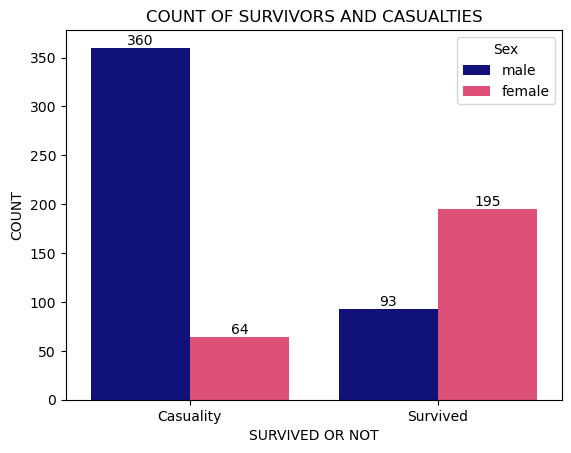

In [9]:
pal= ['#00008B', '#F33A6A']
a= sns.countplot(data= df, x= df['Survived'], hue=df['Sex'], palette= pal)
for container in a.containers:
    a.bar_label(container)
plt.title("COUNT OF SURVIVORS AND CASUALTIES")
plt.xlabel("SURVIVED OR NOT")
plt.ylabel("COUNT")
plt.gca().set_xticklabels(['Casuality', 'Survived'])
plt.show()

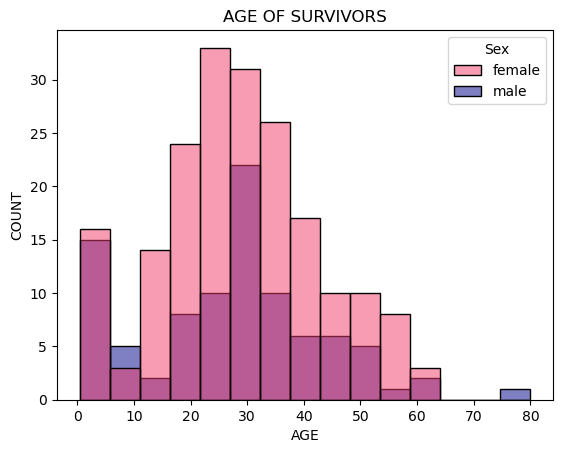

In [10]:
pal1= ['#F33A6A', '#00008B']
survivors= df[df['Survived']==1]
sns.histplot(data= survivors, x= survivors['Age'], bins= 15, hue=survivors['Sex'], palette= pal1)
plt.title("AGE OF SURVIVORS")
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

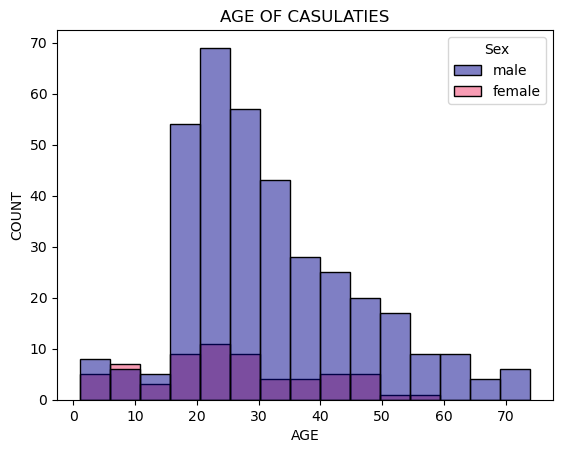

In [11]:
notsurvivors= df[df['Survived']==0]
sns.histplot(data= notsurvivors, x= notsurvivors['Age'], bins= 15, hue= notsurvivors['Sex'], palette= pal)
plt.title("AGE OF CASULATIES")
plt.xlabel('AGE')
plt.ylabel('COUNT')
plt.show()

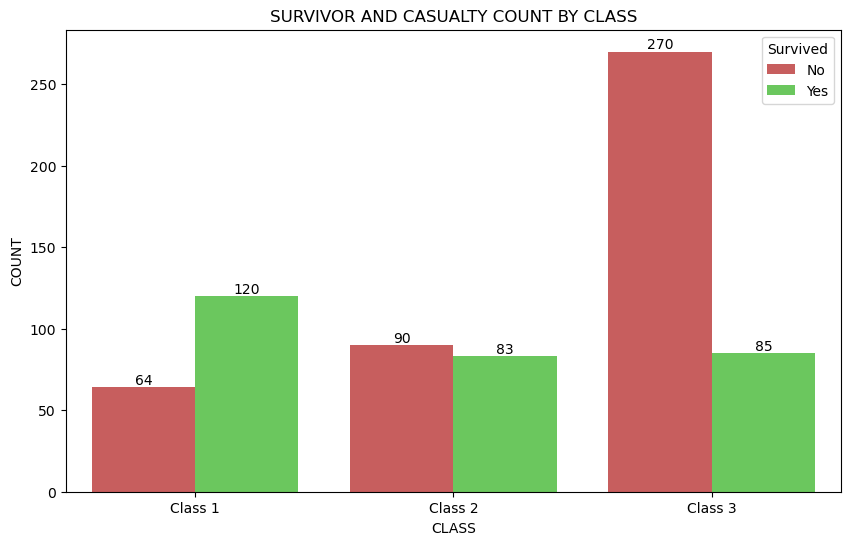

In [12]:
pal3=['#D84D4D', '#5ED84D','#D84D4D', '#5ED84D','#D84D4D', '#5ED84D']
plt.figure(figsize=(10, 6))
a=sns.countplot(data=df, x='Pclass', hue='Survived', palette= pal3)
for container in a.containers:
    a.bar_label(container)
plt.title('SURVIVOR AND CASUALTY COUNT BY CLASS')
plt.xlabel('CLASS')
plt.ylabel('COUNT')
plt.legend(title='Survived', labels=['No', 'Yes']) 
plt.gca().set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()

In [13]:
df['Sex_numeric']= df['Sex'].apply(lambda x:1 if x=='female' else 0)
df[['Survived', 'Pclass', 'Age', 'Sex_numeric', 'SibSp', 'Parch', 'Fare']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Sex_numeric,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,0.536762,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.150826,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.099037,-0.307351,-0.187896,0.093143
Sex_numeric,0.536762,-0.150826,-0.099037,1.000000,0.106296,0.249543,0.182457
SibSp,-0.015523,0.065187,-0.307351,0.106296,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.249543,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.182457,0.139860,0.206624,1.000000


In [14]:
from sklearn.model_selection import train_test_split
X= df[['Sex_numeric', 'Parch', 'Fare']]
y= df['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7663551401869159

In [16]:
from sklearn.metrics import confusion_matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_matrix

,0,1
0,104,18
1,32,60
